<h1>MS-MIS Grad School Admit Predictor:</h1>

Master of Science in Management Information Systems is a growing and competitive field in the tech industry. Every year, thousands of Indian students apply to various colleges for this competitive course. Utilizing the MS-MIS data which I got from Kaggle, I applied Data Cleaning, Exploratory Data Analysis, and Logistic Regression algorithm to predict the status of the students who were "Interested" in applying or had "Applied" to a certain university.

I start by importing relevant libraries to my notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

Now, I will import the data obtained from kaggle into a dataframe:

In [2]:
data = pd.read_csv(r"C:\Users\nakausha\Downloads\datasets_38140_58054_Yocket-dataset.csv", na_values=['NA ', 'N.A. '], error_bad_lines = False)

b'Skipping line 1415: expected 11 fields, saw 12\nSkipping line 1416: expected 11 fields, saw 12\nSkipping line 1417: expected 11 fields, saw 12\nSkipping line 1418: expected 11 fields, saw 12\nSkipping line 1419: expected 11 fields, saw 12\nSkipping line 1420: expected 11 fields, saw 12\nSkipping line 1421: expected 11 fields, saw 12\nSkipping line 1422: expected 11 fields, saw 12\nSkipping line 1423: expected 11 fields, saw 12\nSkipping line 1424: expected 11 fields, saw 12\nSkipping line 1425: expected 11 fields, saw 12\nSkipping line 1426: expected 11 fields, saw 12\nSkipping line 1427: expected 11 fields, saw 12\nSkipping line 1428: expected 11 fields, saw 12\nSkipping line 1429: expected 11 fields, saw 12\nSkipping line 1430: expected 11 fields, saw 12\nSkipping line 1431: expected 11 fields, saw 12\nSkipping line 1432: expected 11 fields, saw 12\nSkipping line 1433: expected 11 fields, saw 12\nSkipping line 1434: expected 11 fields, saw 12\nSkipping line 1435: expected 11 fields

Now, I'm going to view the first few rows of my dataframe to get an initial idea about it:

In [3]:
data.head()

,Unnamed: 0,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
0,1,753255,Arizona State University,Management Information System,Fall 2018,Applied,313,TOEFL,107,62%,6 months
1,2,Ami0603,Arizona State University,Management Information System,Fall 2018,Applied,314,TOEFL,106,7.63 CGPA,6 months
2,3,Sonajan,Arizona State University,Management Information System,Fall 2018,Applied,314,ENG TEST,NaN,80.68%,48 months
3,4,saniya264,Arizona State University,Management Information System,Fall 2018,Applied,307,TOEFL,109,62%,1 month
4,5,Abhiraj29,Arizona State University,Management Information System,Fall 2018,Applied,290,IELTS,7.5,7 CGPA,48 months


First impressions of the data show that it will require changes to the column names (I'll be making it lowercase for ease of access) and removal of the redundant index column.

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,name,university,course,year,status,gre_score,eng_test,test_score,undergrad_score,work_ex
0,753255,Arizona State University,Management Information System,Fall 2018,Applied,313,TOEFL,107,62%,6 months
1,Ami0603,Arizona State University,Management Information System,Fall 2018,Applied,314,TOEFL,106,7.63 CGPA,6 months
2,Sonajan,Arizona State University,Management Information System,Fall 2018,Applied,314,ENG TEST,NaN,80.68%,48 months
3,saniya264,Arizona State University,Management Information System,Fall 2018,Applied,307,TOEFL,109,62%,1 month
4,Abhiraj29,Arizona State University,Management Information System,Fall 2018,Applied,290,IELTS,7.5,7 CGPA,48 months


Now let's take a closer look at the data:

In [6]:
data.describe()

,name,university,course,year,status,gre_score,eng_test,test_score,undergrad_score,work_ex
count,2597,2597,2594,2597,2597,2159,2594,2040,2594,2068
unique,1619,43,13,25,6,60,4,55,575,84
top,Name,Carnegie Mellon University,Management Information System,Fall 2018,Interested,310,TOEFL,7,65%,30 months
freq,39,160,1709,1276,791,97,1718,114,72,116


On further inspection, I found that the column names repeated in the form of a new row in the dataframe:

In [7]:
data[data.university=='University']

,name,university,course,year,status,gre_score,eng_test,test_score,undergrad_score,work_ex
80,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
119,Name,University,NaN,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
200,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
281,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
324,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
375,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
456,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
537,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
618,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex
699,Name,University,Course,Year,Status,GRE_SCORE,Eng_test,Test_score,Undergrad_score,work_ex


I will be deleting these rows as they serve no real purpose to my analysis:

In [8]:
data.drop(data[data.university=='University'].index, axis=0, inplace=True)
data = data.reset_index(drop=True)

<h3>Column-wise Data Cleaning</h3>
<h5>1. Name:</h5>
Username of the candidate plays no actual role in my analysis. hence, I'll be removing the column:

In [9]:
data = data.drop(columns='name')

<h5>2. University:</h5>
I'll start by going through each value in the "University" column:

In [10]:
data['university'].unique()

array(['Arizona State University', 'Boston University',
       'Carnegie Mellon University', 'University of Delaware',
       'Drexel University', 'Drexel Universit', 'University of Arizona',
       'Illinois Institute of Technology',
       'Illinois Institute of Technolog', 'Iowa State University',
       'Indiana University Bloomington',
       'University of Minnesota, Twin Cities', 'Northeastern University',
       'Northwestern University', 'New York University',
       'Pennsylvania State University',
       'Rochester Institute of Technology',
       'Rensselaer Polytechnic Institute',
       'Rutgers University-New Brunswick', 'Rutgers University, Newark',
       'Santa Clara University', 'Stevens Institute of Technology',
       'University at Buffalo SUNY', 'Syracuse University',
       'Texas A&M; University, College Station',
       'Texas A&M; University, College Statio',
       'University of California, Irvine', 'University of Cincinnati',
       'University of Californ

It seems that some names are missing a letter at the end:

In [11]:
data[data.university.isin(['University of Washingto', 'Texas A&M; University, College Statio', 'Illinois Institute of Technolog'])]

,university,course,year,status,gre_score,eng_test,test_score,undergrad_score,work_ex
454,Illinois Institute of Technolog,y Management Information System,Fall 2018,Applied,289,TOEFL,92,66%,90 months
1544,"Texas A&M; University, College Statio",n Management Information System,Fall 2019,Interested,310,TOEFL,106,7.92 CGPA,35 months
2390,University of Washingto,n Management Information System,Fall 2017,Admit,322,TOEFL,109,90.81%,25 months


I will now be updating those names with the actual University names:

In [12]:
data.loc[data.university.isin(['University of Washingto', 'Texas A&M; University, College Statio', 'Illinois Institute of Technolog']), ['university','course']] = [('Illinois Institute of Technology','Management Information System'), ('Texas A&M; University, College Station','Management Information System'), ('University of Washington','Management Information System')]

In [13]:
data['university'].unique()

array(['Arizona State University', 'Boston University',
       'Carnegie Mellon University', 'University of Delaware',
       'Drexel University', 'Drexel Universit', 'University of Arizona',
       'Illinois Institute of Technology', 'Iowa State University',
       'Indiana University Bloomington',
       'University of Minnesota, Twin Cities', 'Northeastern University',
       'Northwestern University', 'New York University',
       'Pennsylvania State University',
       'Rochester Institute of Technology',
       'Rensselaer Polytechnic Institute',
       'Rutgers University-New Brunswick', 'Rutgers University, Newark',
       'Santa Clara University', 'Stevens Institute of Technology',
       'University at Buffalo SUNY', 'Syracuse University',
       'Texas A&M; University, College Station',
       'University of California, Irvine', 'University of Cincinnati',
       'University of California, Los Angeles', 'University of Florida',
       'University of Illinois at Chicago', 'Un

<h5>3. Course:</h5>
Now, I'll start by going through unique values in the "Course" column:

In [14]:
data['course'].unique()

array(['Management Information System',
       'Information Management and Systems', 'Information Systems',
       'y Information Systems', 'Information Science',
       'ICS with concentration in Informatics', 'Informatics',
       'Information Technology and Management', 'Information Management',
       nan], dtype=object)

Well, each college has a different name for similar course. And since the data has been extracted entirely for the MIS course, I believe that the "Course" column doesn't really serve the purpose. So, I'll be removing it from the dataframe:

In [15]:
data = data.drop(columns='course')

<h5>4. Year:</h5>
Just like "Course" column, the "Year" column doesn't serve the purpose of predicting the status of one's application as most universities usually have a standard which doesn't change based on the year of application. Hence, I'll be removing that column from the dataframe:

In [16]:
data = data.drop(columns='year')

<h3>Null Value Check</h3>
Let's check for Null Values across the dataframe:

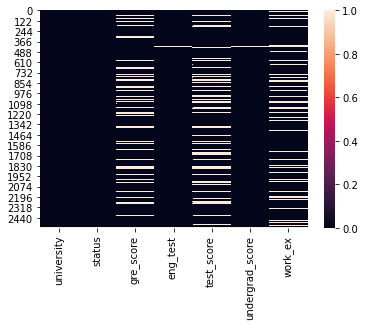

In [17]:
sns.heatmap(data.isna())

In [18]:
print("Percent of empty gre_scores = {} %".format(len(data[data.gre_score.isna()]["gre_score"])/len(data["gre_score"])*100))
print("Percent of empty test_score = {} %".format(len(data[data.test_score.isna()]["test_score"])/len(data["test_score"])*100))
print("Percent of empty work_ex = {} %".format(len(data[data.work_ex.isna()]["work_ex"])/len(data["work_ex"])*100))

Percent of empty gre_scores = 17.15513872606487 %
Percent of empty test_score = 21.805392731535754 %
Percent of empty work_ex = 20.711215318483784 %


In [19]:
data[data["gre_score"].isna()][["gre_score","test_score"]].isnull().count()

gre_score     439
test_score    439
dtype: int64

For our calculations, GRE Score and TOEFL Score are very important, and their absence causes those rows to be irrelevant. Hence, I'll be removing these rows from the dataframe:

In [20]:
data = data.dropna()
data.head()

,university,status,gre_score,eng_test,test_score,undergrad_score,work_ex
0,Arizona State University,Applied,313,TOEFL,107,62%,6 months
1,Arizona State University,Applied,314,TOEFL,106,7.63 CGPA,6 months
3,Arizona State University,Applied,307,TOEFL,109,62%,1 month
4,Arizona State University,Applied,290,IELTS,7.5,7 CGPA,48 months
5,Arizona State University,Applied,306,TOEFL,90,8.2 CGPA,24 months


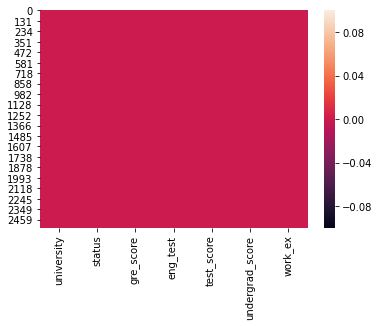

In [21]:
sns.heatmap(data.isna())

<h3>Data Types</h3>

In [22]:
data.head()

,university,status,gre_score,eng_test,test_score,undergrad_score,work_ex
0,Arizona State University,Applied,313,TOEFL,107,62%,6 months
1,Arizona State University,Applied,314,TOEFL,106,7.63 CGPA,6 months
3,Arizona State University,Applied,307,TOEFL,109,62%,1 month
4,Arizona State University,Applied,290,IELTS,7.5,7 CGPA,48 months
5,Arizona State University,Applied,306,TOEFL,90,8.2 CGPA,24 months


In [23]:
data.dtypes

university         object
status             object
gre_score          object
eng_test           object
test_score         object
undergrad_score    object
work_ex            object
dtype: object

Takeaways:
1. "GRE Score", "Test Score", "Undergrad Score", and "Work Ex" will have to be converted to a numerical data type.
2. The "Undergrad Score" and "Work Ex" columns have strings "CGPA", "%", and "months" which can be removed from the dataframe for ease of calculations.

In [24]:
data[['gre_score', 'test_score']] = data[['gre_score', 'test_score']].apply(pd.to_numeric)

In [25]:
data.work_ex = data.work_ex.str.strip(to_strip='months ').apply(pd.to_numeric)

Before stripping the "CGPA" and "%" from "Undergrad Score" column, I will convert the CGPA to Percentage by multiplying CGPA with 9.5 in order to normalize the column.

In [26]:
for i in data.loc[:, "undergrad_score"].index:
    if "CGPA" in data.loc[i, "undergrad_score"]:
        data.loc[i, "undergrad_score"] = pd.to_numeric(data.loc[i, "undergrad_score"].strip("CGPA "))*9.5
    elif "%" in data.loc[i, "undergrad_score"]:        
        data.loc[i, "undergrad_score"] = data.loc[i, "undergrad_score"].strip("%")
data.undergrad_score = pd.to_numeric(data.undergrad_score)

Similarly, in order to normalize the IELTS and TOEFL scores in the "Test Score" column of the dataframe, I will refer to the official score comparision table present [here](https://www.ets.org/s/toefl/pdf/linking_toefl_ibt_scores_to_ielts_scores.pdf)

In [27]:
data.loc[data["eng_test"]=="IELTS", "test_score"] = data.loc[data["eng_test"]=="IELTS", "test_score"].replace({9.0:120, 8.5:117, 8.0:114, 7.5:109, 7.0:101, 6.5:93, 6.0:78, 5.5:59, 5.0:45, 4.5:34, 4.0:31})
data = data.drop(columns="eng_test")

In [28]:
data.head()

,university,status,gre_score,test_score,undergrad_score,work_ex
0,Arizona State University,Applied,313,107.0,62.000,6
1,Arizona State University,Applied,314,106.0,72.485,6
3,Arizona State University,Applied,307,109.0,62.000,1
4,Arizona State University,Applied,290,109.0,66.500,48
5,Arizona State University,Applied,306,90.0,77.900,24


Finally, let's review the data types and describe the dataframe columns:

In [29]:
data.dtypes

university          object
status              object
gre_score            int64
test_score         float64
undergrad_score    float64
work_ex              int64
dtype: object

In [30]:
data.describe()

,gre_score,test_score,undergrad_score,work_ex
count,1621.000000,1621.000000,1621.000000,1621.000000
mean,308.858112,94.579889,70.273521,26.151141
std,9.428855,25.009293,9.149272,17.665443
min,278.000000,0.000000,29.450000,-1.000000
25%,302.000000,93.000000,64.000000,13.000000
50%,309.000000,101.000000,70.000000,24.000000
75%,316.000000,107.000000,76.950000,36.000000
max,336.000000,118.000000,92.150000,144.000000


Takeaways:
1. For our calculations & analysis, the categorical column "Status" can be given numerical values.
2. In the "Work Ex" column, the lowest value is -1 which is not possible. For those rows, let's provide a value of 0.
3. "Work Ex" in months can be converted to "Work Ex" in years.
4. "Test Score" cannot be 0. Probably, the person did not take the English Proficiency Test and updated their score as 0 in their respective profiles. If there is a correlation between any value in the dataframe with "Test Score", we can predict it using Linear Regression Technique. I will review this once I start Exploratory Data Analysis.

In [31]:
data["status"].unique()

array(['Applied', 'Admit', 'Reject', 'Interested'], dtype=object)

In [32]:
data["status"] = pd.to_numeric(data["status"].replace({"Reject": "0", "Admit": "1", "Applied": "2", "Interested": "3"}))

In [33]:
data.loc[data['work_ex']<0, 'work_ex'] = 0

In [34]:
data.loc[data['work_ex']<0, 'work_ex']

Series([], Name: work_ex, dtype: int64)

In [35]:
binInterval = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144]
binLabels   = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
data['work_ex_yrs'] = pd.to_numeric(pd.cut(data['work_ex'], bins = binInterval, labels=binLabels, include_lowest = True))

In [36]:
data = data.drop(columns='work_ex').reset_index(drop=True)
data.head()

,university,status,gre_score,test_score,undergrad_score,work_ex_yrs
0,Arizona State University,2,313,107.0,62.000,0
1,Arizona State University,2,314,106.0,72.485,0
2,Arizona State University,2,307,109.0,62.000,0
3,Arizona State University,2,290,109.0,66.500,3
4,Arizona State University,2,306,90.0,77.900,1


Now, we can't perform our analysis on universities which don't have any information to provide, i.e., those universities whose application status is only in "Interested" or "Applied". So, I'll be finding those and removing them from the list:

In [37]:
data.groupby('university')["status"].unique()

university
Arizona State University                     [2, 1, 0, 3]
Boston University                               [2, 1, 3]
Carnegie Mellon University                   [2, 1, 0, 3]
Drexel University                            [2, 1, 0, 3]
Illinois Institute of Technology             [2, 1, 0, 3]
Indiana University Bloomington               [2, 1, 0, 3]
Iowa State University                        [2, 1, 0, 3]
New York University                          [2, 1, 0, 3]
Northeastern University                      [2, 1, 0, 3]
Northwestern University                         [2, 1, 3]
Pennsylvania State University                [2, 1, 0, 3]
Rensselaer Polytechnic Institute             [2, 1, 0, 3]
Rochester Institute of Technology            [2, 1, 0, 3]
Rutgers University, Newark                   [2, 1, 0, 3]
Rutgers University-New Brunswick             [2, 1, 0, 3]
Santa Clara University                       [2, 1, 0, 3]
Stevens Institute of Technology              [2, 1, 0, 3]
Syr

Takeaways:

1. University of Iowa data is not useful as it does not provide insights into the previous Admits or Rejects. Hence, I'll be removing that.
2. University of California, Los Angeles data only shows the rejections and not acceptances. This could mean that nobody who applied got accepted, or this data is not reliable as not many people apply to this university for MS-MIS course. Hence, I'll be removing that too.

In [38]:
data = data[data['university']!='University of Iowa']

In [39]:
data = data[data['university']!='University of California, Los Angeles']

In [40]:
data = data.reset_index(drop=True)

<h3>Exploratory Data Analysis</h3>

In order to understand the relationship between the multiple columns or as I should start calling them: variables, I will be performing Exploratory Data Analysis:

In [41]:
#Defining Empirical Cumulative Distribution Function
def ecdf(a):
    x = np.sort(a)
    y = np.arange(1, len(x)+1)/len(x)
    return x,y

<h5>1. English Proficiency Test Score Distribution:</h5>

Text(0.5, 1.0, 'English Proficiency Test Score Distribution')

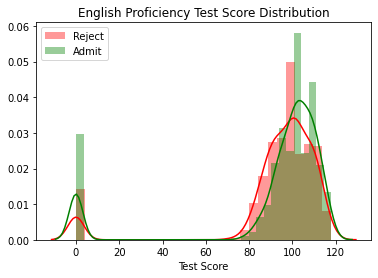

In [42]:
sns.distplot(data[data['status']==0]['test_score'], color = 'r')
sns.distplot(data[data['status']==1]['test_score'], color = 'g')
plt.legend(['Reject','Admit'])
plt.xlabel('Test Score')
plt.title('English Proficiency Test Score Distribution')

As we saw previously, there are a few scores with a value of zero. Without this test score, we will not be able to correctly predict the decision/status of an application. There are two ways to go forward:
1. Find out if "Test Score" has correlation with any of the fields and predict it using Linear Regression.
2. Delete the rows with "Test Score" values of zero.

'Test Scores with a value of zero: '

93

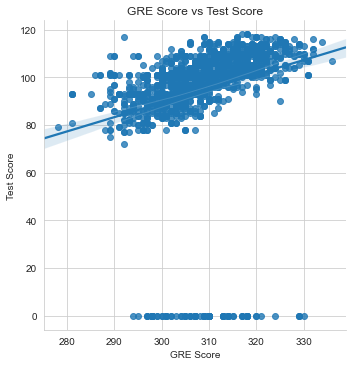

In [43]:
display('Test Scores with a value of zero: ',data[data['test_score']==0].shape[0])
sns.set_style('whitegrid')
sns.lmplot(x='gre_score', y='test_score', data=data).set(xlabel="GRE Score", ylabel = "Test Score", title = "GRE Score vs Test Score")

There is a correlation between "GRE Score" and "Test Score". So, through Linear Regression, I calculated the required values of the Test Scores. However, the predicted values had a very high Mean Squared Error. Therefore, I decided that it would be better to drop the rows with Test Scores of value zero.

In [44]:
data = data.drop(index = data[data['test_score']==0].index).reset_index(drop=True)

On visualizing the plot again, it can be observed that the redundant fields are not present and the graph looks cleaner.

Text(0.5, 1.0, 'English Proficiency Test Score Distribution')

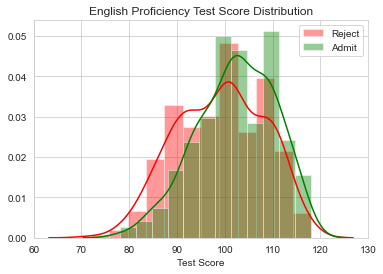

In [45]:
sns.distplot(data[data['status']==0]['test_score'], color = 'r')
sns.distplot(data[data['status']==1]['test_score'], color = 'g')
plt.legend(['Reject','Admit'])
plt.xlabel('Test Score')
plt.title('English Proficiency Test Score Distribution')

For Test Scores lower than 100, the Admit to Reject ratio is low. Above scores of 100, the ratio increases, i.e., chances of getting an Admit increase.

[ 72.  75.  77. ... 118. 118. 118.] [6.60501982e-04 1.32100396e-03 1.98150594e-03 ... 9.98678996e-01
 9.99339498e-01 1.00000000e+00]


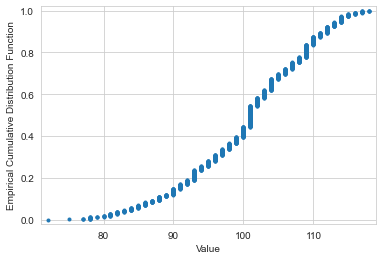

In [46]:
x_val, y_val = ecdf(data['test_score'])
print(x_val, y_val)
plt.plot(x_val,y_val,marker='.',linestyle='none')
plt.xlabel('Value')
plt.ylabel('Empirical Cumulative Distribution Function')
plt.margins(0.02)
plt.show()

<h5>2. GRE Score Distribution:</h5>

Text(0.5, 1.0, 'GRE Score Distribution')

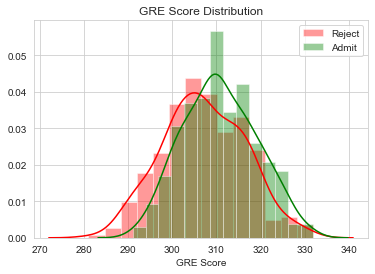

In [47]:
sns.distplot(data[data['status']==0]['gre_score'], color = 'r')
sns.distplot(data[data['status']==1]['gre_score'], color = 'g')
plt.legend(['Reject','Admit'])
plt.xlabel('GRE Score')
plt.title('GRE Score Distribution')

For GRE Scores less than 310, the Admit to Reject Ratio is low. This ratio increases as GRE Score increases (above 310).

[278 281 281 ... 332 334 336] [6.60501982e-04 1.32100396e-03 1.98150594e-03 ... 9.98678996e-01
 9.99339498e-01 1.00000000e+00]


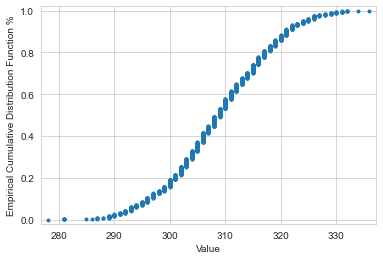

In [48]:
x_val, y_val = ecdf(data['gre_score'])
print(x_val, y_val)
plt.plot(x_val,y_val,marker='.',linestyle='none')
plt.xlabel('Value')
plt.ylabel('Empirical Cumulative Distribution Function %')
plt.margins(0.02)
plt.show()

<h5>3. Work Experience (in Years) Distribution:</h5>

Text(0.5, 1.0, 'Work Experience (in Years) Distribution')

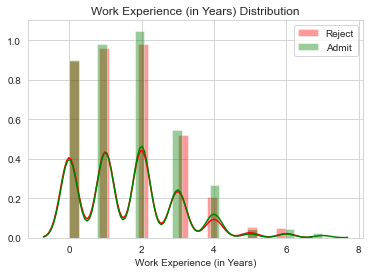

In [49]:
sns.distplot(data[data['status']==0]['work_ex_yrs'], color = 'r')
sns.distplot(data[data['status']==1]['work_ex_yrs'], color = 'g')
plt.legend(['Reject','Admit'])
plt.xlabel('Work Experience (in Years)')
plt.title('Work Experience (in Years) Distribution')

As the work experience of the candidate increases, the Admit to Reject ratio also increases, i.e., chances of getting an Admit also increases.

[0 0 0 ... 7 7 9] [6.60501982e-04 1.32100396e-03 1.98150594e-03 ... 9.98678996e-01
 9.99339498e-01 1.00000000e+00]


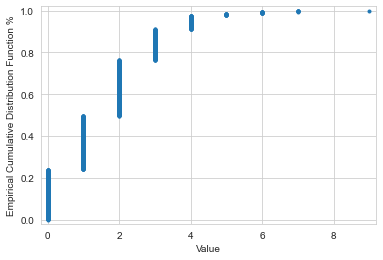

In [50]:
x_val, y_val = ecdf(data['work_ex_yrs'])
print(x_val, y_val)
plt.plot(x_val,y_val,marker='.',linestyle='none')
plt.xlabel('Value')
plt.ylabel('Empirical Cumulative Distribution Function %')
plt.margins(0.02)
plt.show()

<h5>4. Undergrad Score Distribution:</h5>

Text(0.5, 1.0, 'Undergrad Scores Distribution')

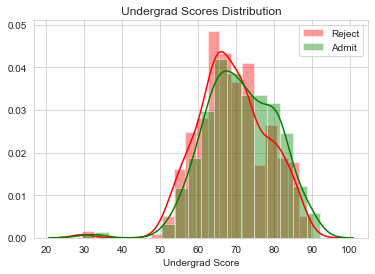

In [51]:
sns.distplot(data[data['status']==0]['undergrad_score'], color = 'r')
sns.distplot(data[data['status']==1]['undergrad_score'], color = 'g')
plt.legend(['Reject','Admit'])
plt.xlabel('Undergrad Score')
plt.title('Undergrad Scores Distribution')

For Undergrad Scores below 75, the Admit to Reject ratio is low. As the scores increase above 75, this ratio increases, which means that higher number of candidates with scores above 75 got an Admit.

Note: Although insights are drawn from the distributions, they may vary from one university to another based on the universities' selection criteria.

[29.45 29.45 29.83 ... 91.2  91.5  92.15] [6.60501982e-04 1.32100396e-03 1.98150594e-03 ... 9.98678996e-01
 9.99339498e-01 1.00000000e+00]


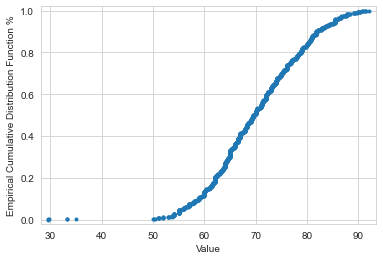

In [52]:
x_val, y_val = ecdf(data['undergrad_score'])
print(x_val, y_val)
plt.plot(x_val,y_val,marker='.',linestyle='none')
plt.xlabel('Value')
plt.ylabel('Empirical Cumulative Distribution Function %')
plt.margins(0.02)
plt.show()

<h3>Prediction of Status of the Application</h3>

I'll begin by categorizing the universities based on the average GRE Scores at which they accept an application. This categorical column will be called 'Rating' of a university and will be used in the calculations instead of the university name:

In [53]:
univ = data[data['status']==1].groupby('university').mean()['gre_score'].sort_values(ascending=False).reset_index()
univ

,university,gre_score
0,University of Washington,320.400000
1,Rensselaer Polytechnic Institute,319.875000
2,"University of California, Irvine",319.500000
3,Indiana University Bloomington,318.200000
4,Pennsylvania State University,318.125000
5,Carnegie Mellon University,317.242424
6,University of Pennsylvania,317.000000
7,University of Arizona,316.466667
8,University of Texas at Austin,315.500000
9,"Texas A&M; University, College Station",314.769231


In [54]:
bins = 6
binLength = (univ.describe().loc['max'][0] - univ.describe().loc['min'][0]) / bins
binLength

3.538888888888882

In [55]:
list(range(int(univ.describe().loc['min'][0]), int(univ.describe().loc['max'][0]), int(binLength)))

[299, 302, 305, 308, 311, 314, 317]

In [56]:
binInterval = list(range(int(univ.describe().loc['min'][0]), int(univ.describe().loc['max'][0]), int(binLength)))
binLabels   = list(range(1,len(binInterval)))
univ['rating'] = pd.cut(univ['gre_score'], bins = binInterval, labels=binLabels, right=True)

In [57]:
univ=univ[['university','rating']]

In [58]:
univ.loc[:,'rating']= pd.to_numeric(univ.loc[:,'rating']).fillna(len(binLabels)+1)

C:\Users\nakausha\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [59]:
temp=[]
for i in data['university'].index:
    for j in univ['university'].index:
        if data.iloc[i,0]==univ.iloc[j,0]:
            temp.append(univ.iloc[j,1])

In [60]:
data['rating'] = pd.Series(temp)

Now that the Rating column has been established, I'll start by diving the data into testing and training data.

The testing data contains applications with status as "Applied" or "Interested" to predict the status of their application:

In [61]:
test = data[data["status"].isin([2,3])]
univ_backup = test['university']
test = test.drop(columns=["status","university"])
test

,gre_score,test_score,undergrad_score,work_ex_yrs,rating
0,313,107.0,62.000,0,4.0
1,314,106.0,72.485,0,4.0
2,307,109.0,62.000,0,4.0
3,290,109.0,66.500,3,4.0
4,306,90.0,77.900,1,4.0
...,...,...,...,...,...
1509,311,101.0,58.710,2,3.0
1510,306,109.0,50.000,2,3.0
1511,297,101.0,65.265,2,3.0
1512,315,109.0,60.000,2,3.0


The training data contains applications with status as "Admit" or "Reject":

In [62]:
train = data[data["status"].isin([0,1])].drop(columns=["university"])
train

,status,gre_score,test_score,undergrad_score,work_ex_yrs,rating
15,1,315,104.0,77.000,0,4.0
16,1,311,101.0,73.530,2,4.0
17,1,312,110.0,81.700,1,4.0
18,1,307,103.0,76.000,2,4.0
19,1,321,102.0,71.250,0,4.0
...,...,...,...,...,...,...
1503,0,299,88.0,75.525,0,3.0
1504,0,308,99.0,62.500,4,3.0
1505,0,288,89.0,55.340,0,3.0
1506,0,302,86.0,65.000,2,3.0


In order to predict the result of the application of a candidate as "Admit" or "Reject" (1 or 0), Logistic Regression Algorithm is being implemented as follows:

In [63]:
y = train["status"]

In [64]:
X = train.drop(columns='status')

Splitting X and y variables into testing and training data:

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(583, 5)
(251, 5)
(583,)
(251,)


In [66]:
#Logistic Regression:
LR = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class='ovr', max_iter = 10000)

In [67]:
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

Once the algorithm has been trained and the values predicted, I'll check for the accuracy of the algorithm by generating an accuracy score, confusion matrix and classification report as follows:

In [68]:
accuracy = accuracy_score(y_test, y_pred)*100
display("Accuracy of Logistic Regression = {:.2f}%".format(accuracy))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

'Accuracy of Logistic Regression = 63.75%'

[[65 39]
 [52 95]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59       104
           1       0.71      0.65      0.68       147

    accuracy                           0.64       251
   macro avg       0.63      0.64      0.63       251
weighted avg       0.65      0.64      0.64       251



The accuracy of this Logistic Regression algorithm is 68.92%. This means that if a candidate is predicted to get an Admit, he/she will have a 68.92% chance of receiving an admit and a 31.08% chance of receiving a Reject.

To understand the accuracy better, I have generated the plot for distribution of Actual and Predicted values:

Text(0.5, 0, 'Prediction level')

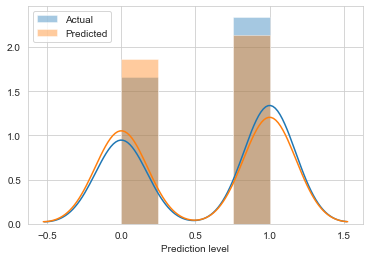

In [69]:
sns.distplot(y_test,label = 'Actual')
sns.distplot(y_pred, label ='Predicted')
plt.legend(loc="upper left")
plt.xlabel('Prediction level')

If I had predicted all applications to receive an "Admit", the accuracy would've been 53.36%. With our trained algorithm, this accuracy increased to 68.92%. (This is not a very huge difference considering the efforts taken to reach this point.)

In [70]:
display('Accuracy with the training model: ', accuracy)
display('Accuracy on setting status to Admit: ',train['status'].value_counts(normalize=True)[1]*100)

'Accuracy with the training model: '

63.745019920318725

'Accuracy on setting status to Admit: '

53.357314148681056

Let's review the feature importance graph to understand how each feature contributed to the model:

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

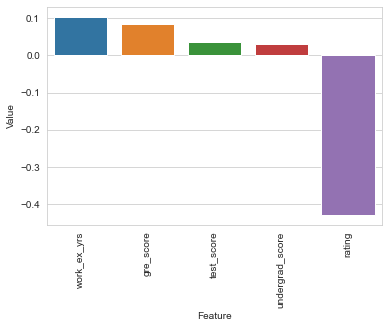

In [71]:
#feature importance
importance = LR.coef_[0]
# plot feature importance
feature_importance = pd.DataFrame(sorted(zip(importance, X.columns)), columns=['Value','Feature'])
sns.barplot(x="Feature", y="Value", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xticks(rotation=90)

Observation:

As the rating of the University reduced, the chances of receiving an Admit also reduced. 

Takeaway:

This means that the University and GRE Scores (as ratings were derived based on these scores) play a very important role in deciding the result of an application.

Let's use the trained model to predict the result of applications which were marked "Applied" or "Interested":

In [72]:
test["status"] = LR.predict(test)
test['status'] = test['status'].replace({0:'Reject', 1:'Admit'})
test['university'] = univ_backup
test = test[['university', 'gre_score', 'test_score', 'undergrad_score', 'work_ex_yrs', 'status']]
test.to_csv("test.csv")
test

,university,gre_score,test_score,undergrad_score,work_ex_yrs,status
0,Arizona State University,313,107.0,62.000,0,Admit
1,Arizona State University,314,106.0,72.485,0,Admit
2,Arizona State University,307,109.0,62.000,0,Reject
3,Arizona State University,290,109.0,66.500,3,Reject
4,Arizona State University,306,90.0,77.900,1,Reject
...,...,...,...,...,...,...
1509,Worcester Polytechnic Institute,311,101.0,58.710,2,Admit
1510,Worcester Polytechnic Institute,306,109.0,50.000,2,Admit
1511,Worcester Polytechnic Institute,297,101.0,65.265,2,Reject
1512,Worcester Polytechnic Institute,315,109.0,60.000,2,Admit


<h3>Conclusion:</h3>

We performed intensive Data Cleaning to improve our understanding of the data. On the clean data, Exploratory Data Analysis was performed to see how the variables affect the status of an application. We further improved the features so that they could be used to train our Logistic Regression algorithm. Finally, we trained our model, reviewed the accuracy and importance of the features, and predicted the status of applications which were marked "Interested" or "Applied".